In [1]:
import PyMGA
import numpy as np
import os
import yaml
import matplotlib.pyplot as plt

### Read the config file used to define solver settings for the PyPSA network

In [2]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

MGA variables can be defined from the config file:

In [3]:
variables = {}
for x_i in config['variables']:
    var_i = config['variables'][x_i]
    variables[x_i] = [var_i[key] for key in var_i]
    variables[x_i][3] = config['contry_groups'][variables[x_i][3]]

Or directly in python

In [3]:
variables = {'x1': ['Generator',
                    ['onwind', 'offwind-ac', 'offwind-dc'],
                    'p_nom',
                    ['NO', 'SE', 'FI', 'DK', 'GB', 'IE']],
            'x2': ['Generator',
                    ['onwind', 'offwind-ac', 'offwind-dc'],
                    'p_nom',
                    ['DE', 'AT', 'LU', 'BE', 'NL', 'CZ']]}

Variables must be specified by the following pattern:  
variables = {var name: [Component type, [carrier1, carrier2, ...], optimization parameter, [country1, country2, ...] }

The variable summarizes over the listed carriers and countries

In [4]:
case = PyMGA.cases.PyPSA_case(config, 
                              'network.nc',
                              variables=variables,
                              mga_slack=0.1,
                              n_snapshots=10)

#### MGA method

The PyMGA module contains a range of MGA/MAA methods, available under `PyMGA.methods`. 

In [5]:
method = PyMGA.methods.MGA(case)

Start by initializing the method by finding the optimal solution

In [6]:
opt_sol, obj = method.find_optimum()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-28
Read LP format model from file C:\Users\lukas\Documents\GitHub\PyMGA_LBN\tmp\pypsa-problem-ztmoau36.lp
Reading time = 0.10 seconds
obj: 15389 rows, 7858 columns, 31548 nonzeros
Set parameter Threads to value 2
Set parameter Method to value 2
Set parameter Crossover to value 0
Set parameter BarConvTol to value 1e-06
Set parameter Seed to value 123
Set parameter AggFill to value 0
Set parameter PreDual to value 0
Set parameter GURO_PAR_BARDENSETHRESH to value 200
Read LP format model from file C:\Users\lukas\Documents\GitHub\PyMGA_LBN\tmp\pypsa-problem-y3y1yac6.lp
Reading time = 0.12 seconds
obj: 15388 rows, 7769 columns, 29679 nonzeros
Set parameter Threads to value 2
Set parameter Method to value 2
Set parameter Crossover to value 0
Set parameter BarConvTol to value 1e-06
Set parameter Seed to value 123
Set parameter AggFill to value 0
Set parameter PreDual to value 0
Set parameter GURO_PAR_BARDE

75427124716.8762

In [8]:
verticies, directions, _, _ = method.search_directions(14)

In [9]:
MAA_samples = PyMGA.sampler.har_sample(5000, x0=np.zeros(2), directions=directions, verticies=verticies)

violating constraint [0, 1, 5, 7, 11, 14, 17]
[ -31509.92012965 -113543.94487892 -144783.12843987  -67256.5331091
 -133636.2424148   -82597.06981411 -117769.28847289]
x0 not in large volume. Trying again. i:0


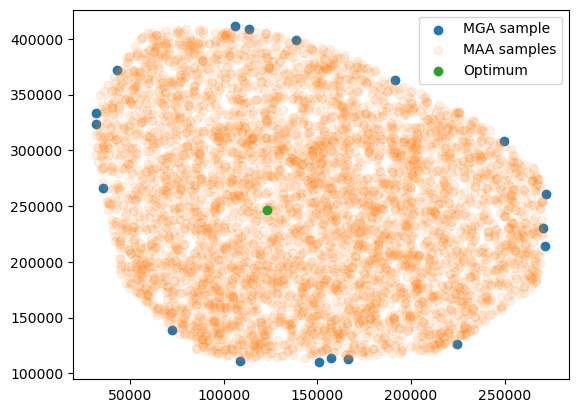

In [10]:
plt.scatter(verticies[:,0],verticies[:,1],label='MGA sample')
plt.scatter(MAA_samples[:,0],MAA_samples[:,1],alpha=0.1,label='MAA samples')
plt.scatter([opt_sol[0]], [opt_sol[1]],label='Optimum')
plt.legend()